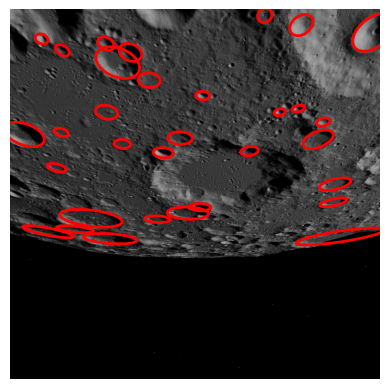

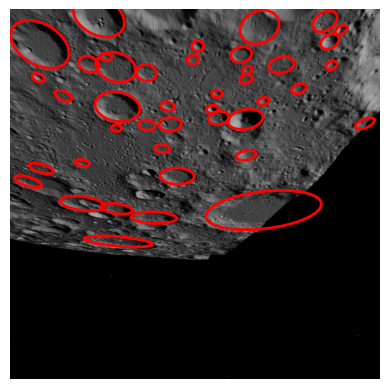

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import os
import random

# Set the paths to the folders
data_folder = "../data/LDEM_-90_-45E_0_45N/"
ground_truth_folder = os.path.join(data_folder, "ground_truth_images")
crater_detections_folder = os.path.join(data_folder, "crater_detections")

# Function to read ellipse data from a file
def read_ellipse_data(file_path):
    ellipses = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines[1:]:  # Skip the header line
            values = list(map(float, line.split(',')))
            ellipses.append(values)
    return ellipses

# Function to plot an image with ellipses
def plot_image_with_ellipses(image_path, ellipse_data):
    # Load the image
    image = plt.imread(image_path)

    # Create a plot
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')
    ax.set_axis_off()

    # Add ellipses
    for ellipse in ellipse_data:
        x, y, major, minor, angle, confidence = ellipse
        if confidence >= 0.9:
            ellipse_patch = Ellipse((x, y), 2 * major, 2 * minor, angle=angle,
                                    edgecolor='red', facecolor='none', linewidth=2)
            ax.add_patch(ellipse_patch)

    plt.show()

# Get all available image and text file numbers
image_files = [f for f in os.listdir(ground_truth_folder) if f.endswith('.png')]
file_numbers = [os.path.splitext(f)[0] for f in image_files]

# Select two random file numbers
selected_files = random.sample(file_numbers, 2)

# Plot the selected images with ellipses
for file_number in selected_files:
    image_path = os.path.join(ground_truth_folder, f"{file_number}.png")
    ellipse_file_path = os.path.join(crater_detections_folder, f"{file_number}.txt")

    # Read ellipse data
    ellipses = read_ellipse_data(ellipse_file_path)

    # Plot the image with ellipses
    plot_image_with_ellipses(image_path, ellipses)